# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
queryURL = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(queryURL + city).json()

In [4]:
# set up empty lists for needed characters
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
processingRecord = 0
setNumber = 1

#start processing record at 1
processingRecord = 1
setNumber = 1

print("Beginning Data Retrieval")
print("-------------------------")

# loop through each city
for city in cities:
    
#Exception handling
    try:
        response = requests.get(queryURL + city).json()
        city_id.append(response['id'])
        city_name.append(response['name']) 
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity']) 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max']) 
        wind_speed.append(response['wind']['speed'])
        cityResponse = response['name']   
        if processingRecord > 49:
            processingRecord = 0
            setNumber = setNumber + 1
    
        else:
            processingRecord = processingRecord + 1

        print(f"Processing Record {processingRecord} of {setNumber} | {cityResponse}")
        
    except:
        print("city not found. Skipping ...")
    continue
    
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 2 of 1 | Mattru
Processing Record 3 of 1 | Hilo
Processing Record 4 of 1 | Albany
Processing Record 5 of 1 | Rawson
Processing Record 6 of 1 | Chokurdakh
Processing Record 7 of 1 | Busselton
Processing Record 8 of 1 | Punta Arenas
city not found. Skipping ...
Processing Record 9 of 1 | Chui
Processing Record 10 of 1 | Rikitea
Processing Record 11 of 1 | Arraial do Cabo
Processing Record 12 of 1 | Airai
Processing Record 13 of 1 | Anuradhapura
Processing Record 14 of 1 | Avarua
Processing Record 15 of 1 | New Norfolk
Processing Record 16 of 1 | Kalugumalai
Processing Record 17 of 1 | Weligama
Processing Record 18 of 1 | Portland
Processing Record 19 of 1 | Epe
Processing Record 20 of 1 | Ushuaia
city not found. Skipping ...
city not found. Skipping ...
Processing Record 21 of 1 | Mon
Processing Record 22 of 1 | Faanui
Processing Record 23 of 1 | Mataura
Processing Record 24 of 1 | Ribeira Grande
Processing Record 25 of

Processing Record 1 of 5 | San Andrés
Processing Record 2 of 5 | Vaini
Processing Record 3 of 5 | Zhangye
Processing Record 4 of 5 | Boa Vista
Processing Record 5 of 5 | Umm Kaddadah
Processing Record 6 of 5 | Ancud
Processing Record 7 of 5 | Hazorasp
Processing Record 8 of 5 | Areia Branca
Processing Record 9 of 5 | Rexburg
Processing Record 10 of 5 | Marystown
Processing Record 11 of 5 | Cidreira
Processing Record 12 of 5 | Lorengau
Processing Record 13 of 5 | Havelock
city not found. Skipping ...
Processing Record 14 of 5 | Newport
Processing Record 15 of 5 | Sambava
Processing Record 16 of 5 | Villazón
city not found. Skipping ...
Processing Record 17 of 5 | Kununurra
Processing Record 18 of 5 | Karpathos
Processing Record 19 of 5 | Uyuni
Processing Record 20 of 5 | Fairbanks
Processing Record 21 of 5 | Kholtoson
Processing Record 22 of 5 | Teahupoo
Processing Record 23 of 5 | Beyneu
Processing Record 24 of 5 | Tanete
Processing Record 25 of 5 | Cortez
Processing Record 26 of 5 | N

Processing Record 4 of 9 | Sabha
city not found. Skipping ...
city not found. Skipping ...
Processing Record 5 of 9 | Ridgecrest
Processing Record 6 of 9 | Tricase
Processing Record 7 of 9 | Laguna
Processing Record 8 of 9 | Nahrin
city not found. Skipping ...
Processing Record 9 of 9 | Cap Malheureux
Processing Record 10 of 9 | Walvis Bay
Processing Record 11 of 9 | Zaraza
Processing Record 12 of 9 | Strezhevoy
Processing Record 13 of 9 | Puerto Cabezas
Processing Record 14 of 9 | Alofi
Processing Record 15 of 9 | Masallātah
Processing Record 16 of 9 | Hede
Processing Record 17 of 9 | Maţāy
Processing Record 18 of 9 | Wewak
Processing Record 19 of 9 | Paraná
Processing Record 20 of 9 | Troitskoye
city not found. Skipping ...
Processing Record 21 of 9 | Tilichiki
Processing Record 22 of 9 | Kirakira
Processing Record 23 of 9 | Musiri
Processing Record 24 of 9 | Alūksne
Processing Record 25 of 9 | Kieta
city not found. Skipping ...
Processing Record 26 of 9 | Zonguldak
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
weatherDict = {
    "City ID":city_id, 
    "City Name":city_name, 
    "Cloudiness":cloudiness,
    "Country":country, 
    "Date":date, 
    "Humidity":humidity,
    "Latitude":lat,
    "Longitude":lng, 
    "Max Temperature":max_temp,
    "Wind Speed":wind_speed
}
weatherDict = pd.DataFrame(weatherDict)
weatherDict.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,2409215,Mattru,100,SL,1658688852,97,7.6244,-11.8332,72.21,3.44
1,5855927,Hilo,75,US,1658688608,70,19.7297,-155.0900,81.28,1.01
2,5106841,Albany,33,US,1658688483,39,42.6001,-73.9662,98.17,10.83
3,3839307,Rawson,100,AR,1658688852,71,-43.3002,-65.1023,44.06,12.37
4,2126123,Chokurdakh,97,RU,1658688853,57,70.6333,147.9167,55.20,5.82


In [27]:
weatherDict.count()

City ID            582
City Name          582
Cloudiness         582
Country            582
Date               582
Humidity           582
Latitude           582
Longitude          582
Max Temperature    582
Wind Speed         582
dtype: int64

In [28]:
weatherDict.to_csv("output_data/weatherDict.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
maxHumid = weatherDict.loc[weatherDict['Humidity'] != 100]
maxHumid.describe()

,City ID,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
count,5.790000e+02,579.000000,5.790000e+02,579.000000,579.000000,579.000000,579.000000,579.000000
mean,2.681081e+06,54.962003,1.658689e+09,70.585492,19.824604,19.769498,70.550069,7.458342
std,1.655119e+06,40.454322,1.071123e+02,21.539074,33.333928,89.328876,14.818315,5.018350
min,5.365400e+04,0.000000,1.658688e+09,6.000000,-54.800000,-179.166700,33.150000,0.000000
25%,1.504594e+06,11.000000,1.658689e+09,59.000000,-8.328350,-60.088250,59.370000,3.760000
50%,2.161515e+06,63.000000,1.658689e+09,76.000000,23.116700,26.891000,72.210000,6.150000
75%,3.619935e+06,100.000000,1.658689e+09,87.000000,47.562950,96.147600,81.290000,10.225000
max,7.671223e+06,100.000000,1.658689e+09,99.000000,78.218600,179.316700,111.250000,31.180000


In [30]:
#  Get the indices of cities that have humidity over 100%.
maxHumid.count()

City ID            579
City Name          579
Cloudiness         579
Country            579
Date               579
Humidity           579
Latitude           579
Longitude          579
Max Temperature    579
Wind Speed         579
dtype: int64

In [31]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [32]:
maxHumid.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,2409215,Mattru,100,SL,1658688852,97,7.6244,-11.8332,72.21,3.44
1,5855927,Hilo,75,US,1658688608,70,19.7297,-155.0900,81.28,1.01
2,5106841,Albany,33,US,1658688483,39,42.6001,-73.9662,98.17,10.83
3,3839307,Rawson,100,AR,1658688852,71,-43.3002,-65.1023,44.06,12.37
4,2126123,Chokurdakh,97,RU,1658688853,57,70.6333,147.9167,55.20,5.82


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

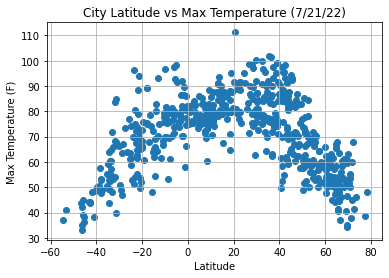

In [33]:
plt.scatter(maxHumid["Latitude"], maxHumid["Max Temperature"])
plt.title("City Latitude vs Max Temperature (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

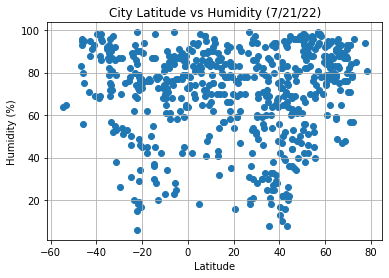

In [34]:
plt.scatter(maxHumid["Latitude"], maxHumid["Humidity"])
plt.title("City Latitude vs Humidity (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

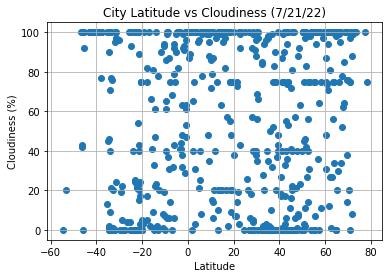

In [35]:
plt.scatter(maxHumid["Latitude"], maxHumid["Cloudiness"])
plt.title("City Latitude vs Cloudiness (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

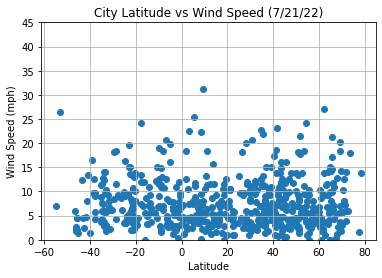

In [36]:
plt.scatter(maxHumid["Latitude"], maxHumid["Wind Speed"])
plt.title("City Latitude vs Wind Speed (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,45)
plt.grid()
plt.show()

## Linear Regression

In [37]:
north = maxHumid['Latitude'] >= 0
northernHem = maxHumid[north]
southernHem = maxHumid[~north]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.4436441519920463


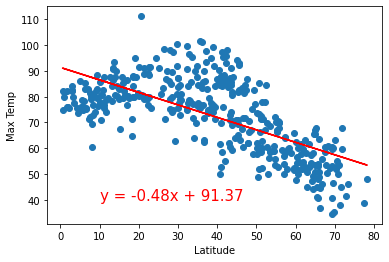

In [38]:
x_values = northernHem['Latitude']
y_values = northernHem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.570152051164593


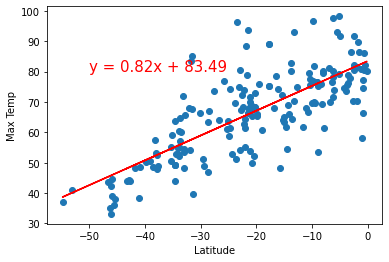

In [39]:
x_values = southernHem['Latitude']
y_values = southernHem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.009653516394166199


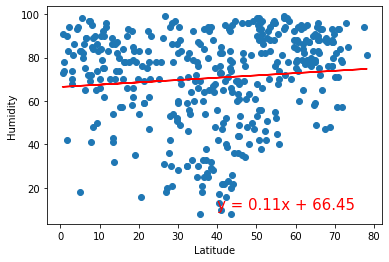

In [40]:
x_values = northernHem['Latitude']
y_values = northernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.03223077577645941


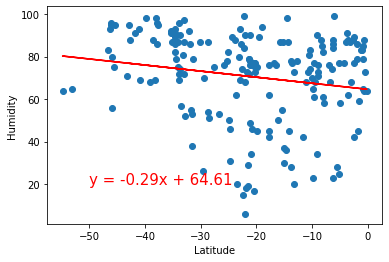

In [41]:
x_values = southernHem['Latitude']
y_values = southernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.00042802500250277133


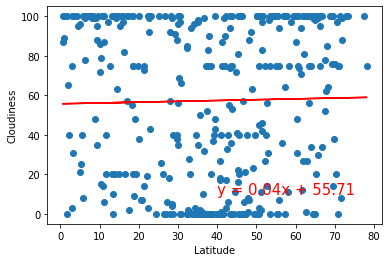

In [42]:
x_values = northernHem['Latitude']
y_values = northernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.00022200913916472153


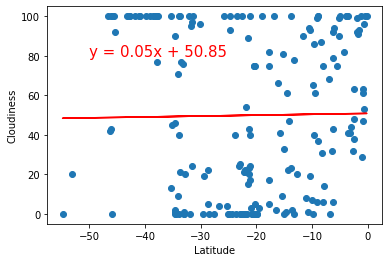

In [43]:
x_values = southernHem['Latitude']
y_values = southernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0005284629588878616


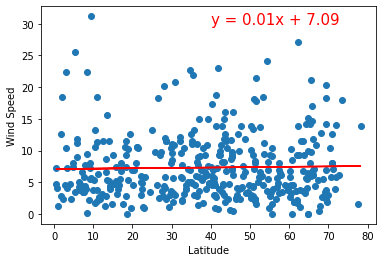

In [44]:
x_values = northernHem['Latitude']
y_values = northernHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.00019757117210575351


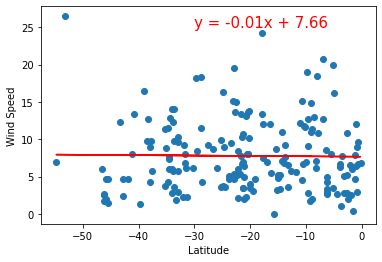

In [45]:
x_values = southernHem['Latitude']
y_values = southernHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.show()